In [3]:
from diffusers.utils import load_image, make_image_grid
from PIL import Image
import cv2
import numpy as np

original_image = load_image(
    "./controlNetImages/pomTwo.jpeg"
)

image = np.array(original_image)

low_threshold = 100
high_threshold = 200

image = cv2.Canny(image, low_threshold, high_threshold)
image = image[:, :, None]
image = np.concatenate([image, image, image], axis=2)
canny_image = Image.fromarray(image)

In [4]:
from diffusers import StableDiffusionControlNetPipeline, ControlNetModel, UniPCMultistepScheduler
import torch

controlnet = ControlNetModel.from_pretrained("lllyasviel/sd-controlnet-canny", torch_dtype=torch.float16, use_safetensors=True)
pipe = StableDiffusionControlNetPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5", controlnet=controlnet, torch_dtype=torch.float16, use_safetensors=True
)

pipe.scheduler = UniPCMultistepScheduler.from_config(pipe.scheduler.config)
pipe.enable_model_cpu_offload()

Loading pipeline components...: 100%|██████████| 7/7 [00:03<00:00,  2.07it/s]


  0%|          | 0/50 [00:00<?, ?it/s]C:\Users\dan_d\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\diffusers\models\attention_processor.py:1279: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at ..\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:263.)
  hidden_states = F.scaled_dot_product_attention(
100%|██████████| 50/50 [32:25<00:00, 38.92s/it]


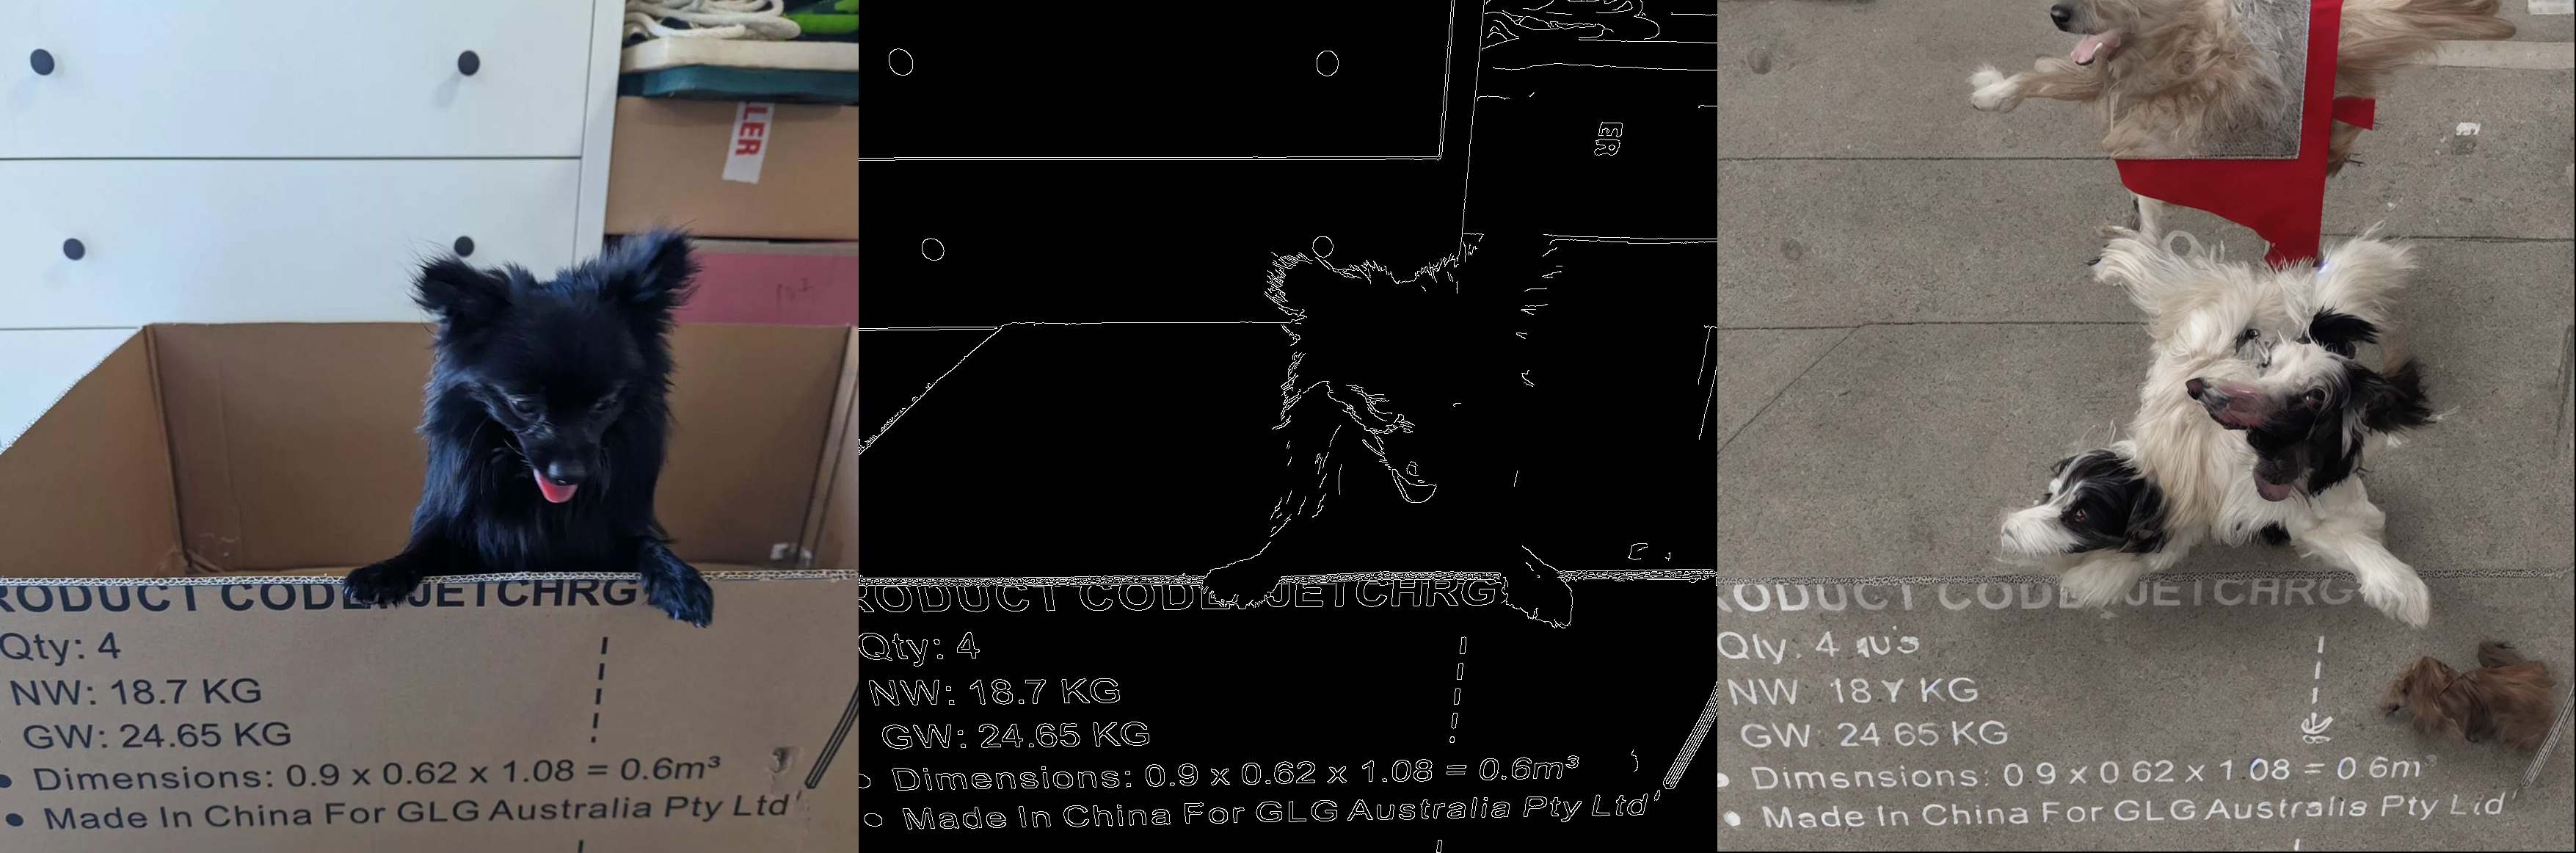

In [5]:
output = pipe(
    "Dog with wings", image=canny_image
).images[0]
make_image_grid([original_image, canny_image, output], rows=1, cols=3)

In [6]:
output.save("Doge.jpg")

In [ ]:
canny_image.save("canny.jpg")